In [8]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [9]:
files_largeb = [file for file in os.listdir('varying_b_a0_large/') if 'results' in file]
files_smallb = [file for file in os.listdir('varying_b_a0_small/') if 'results' in file]

In [10]:
along_m = list(np.linspace(1500,29900,20))[::-1]
along_ap_largeb = list(np.linspace(7.7,8.8,20)+1)
along_ap_smallb = list(np.linspace(7.7,8.8,20)-1)

In [11]:
with open('varying_b_a0_large/' + files_largeb[0], 'rb') as f:
    test = pickle.load(f)

In [12]:
cmap_largeb = np.zeros((len(along_m), len(along_ap_largeb)))

for file in files_largeb:
    with open('varying_b_a0_large/' + file, 'rb') as f:
        file_result = pickle.load(f)['results']
    for n in range(len(file_result)):
        apind = along_ap_largeb.index(file_result[n]['ap'])
        mind = along_m.index(file_result[n]['m'])

        cmap_largeb[mind,apind] = file_result[n]['Y_treatment'] / file_result[n]['Y_control']

In [14]:
cmap_smallb = np.zeros((len(along_m), len(along_ap_smallb)))

for file in files_smallb:
    with open('varying_b_a0_small/' + file, 'rb') as f:
        file_result = pickle.load(f)['results']
    for n in range(len(file_result)):
        apind = along_ap_smallb.index(file_result[n]['ap'])
        mind = along_m.index(file_result[n]['m'])

        cmap_smallb[mind,apind] = file_result[n]['Y_treatment'] / file_result[n]['Y_control']

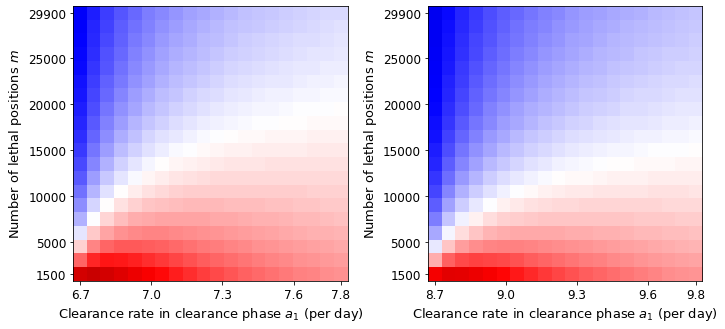

In [20]:
fig, ax = plt.subplots(1,2,figsize = (10,5))

ax[0].imshow(cmap_smallb, vmin = 0, vmax = 2, cmap = 'seismic')
ax[1].imshow(cmap_largeb, vmin = 0, vmax = 2, cmap = 'seismic')

ax[0].set_xticks(calculate_ticks(param_ticks['ap_small'], param_ranges['ap_small'], [0,19]))
ax[0].set_xticklabels(param_ticks['ap_small'])
ax[1].set_xticks(calculate_ticks(param_ticks['ap_large'], param_ranges['ap_large'], [0,19]))
ax[1].set_xticklabels(param_ticks['ap_large'])

for i in range(2):
    ax[i].set_yticks(19-calculate_ticks(param_ticks['m'], param_ranges['m'], [0,19]))
    ax[i].set_yticklabels(param_ticks['m'])
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel('Clearance rate in clearance phase $a_1$ (per day)', fontsize = 13)
    ax[i].set_ylabel('Number of lethal positions $m$', fontsize = 13)

plt.tight_layout()
plt.savefig('varying_b_a0_heatmap_JUNE26.jpg', dpi = 500, bbox_inches = 'tight')

In [18]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

In [19]:
param_ticks = {'m':[1500,5000,10000,15000,20000,25000,29900],
               'ap_small':[6.7,7.0,7.3,7.6,7.8],
               'ap_large':[8.7,9.0,9.3,9.6,9.8]}
param_ranges = {'m':[1500,29900],
                'ap_small':[6.7,7.8],
                'ap_large':[8.7,9.8]}